# Q2. Impacts on Training

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import constants as C

## Age Regression

In [2]:
age_lgbm = pd.read_csv("assets/lgbm_ukb_241108_0113.csv")
age_knn = pd.read_csv("assets/knn_ukb_241108_0147.csv")

In [3]:
def plot_age_ml(metric: str, perf_table: pd.DataFrame, sort_by_perf: bool = True,
                 plot_type: str = "box", cmap: str = "light:b"):
    # Rename contents to mapper
    df = perf_table.copy()
    df["XAI Method"] = df["XAI Method"].apply(C.XAI_METHODS_MAPPER.get)
    df["Model Key"] = df["Model Key"].apply(C.MODEL_KEY.get)

    # Sort data
    if sort_by_perf:
        custom_order = df.groupby("XAI Method").agg({metric: "mean"}).sort_values(by=metric).index.tolist()

    # Plot data
    fig, ax = plt.subplots(figsize=(14, 4))
    # Plot Average
    ax.axhline(C.PERF_AVG[metric], linestyle="--", color="k", label=f"Baseline {metric.upper()}")
    avg = df.groupby("XAI Method").agg({metric: "mean"}).sort_values(by=metric).reset_index()
    ax.scatter(x=avg["XAI Method"], y=avg[metric], label=f"Average {metric.upper()}",
                marker="*", color="red", s=300, edgecolors="white", zorder=10)
    if plot_type == "box":    
        # Plot box
        flierprops = dict(marker='o', markerfacecolor="gray", markersize=5,
                          markeredgecolor='white', markeredgewidth=.2, alpha=0.4)
        sns.boxplot(data=df, x="XAI Method", y=metric, hue="Model Key",
                    palette=cmap, ax=ax, flierprops=flierprops)

    elif plot_type == "bar":
        sns.barplot(data=df, x="XAI Method", y=metric, hue="Model Key",
                    palette=cmap, ax=ax)
    ax.set_xlabel("Interpretability Methods", size="large")
    ax.set_ylabel({"mae": "Mean Average Error",
                   "mse": "Mean Squared Error",
                   "r2": "R-squared"}[metric], size="large")
    sns.move_legend(obj=ax, loc="upper left", bbox_to_anchor=(1, 1))

### MAE

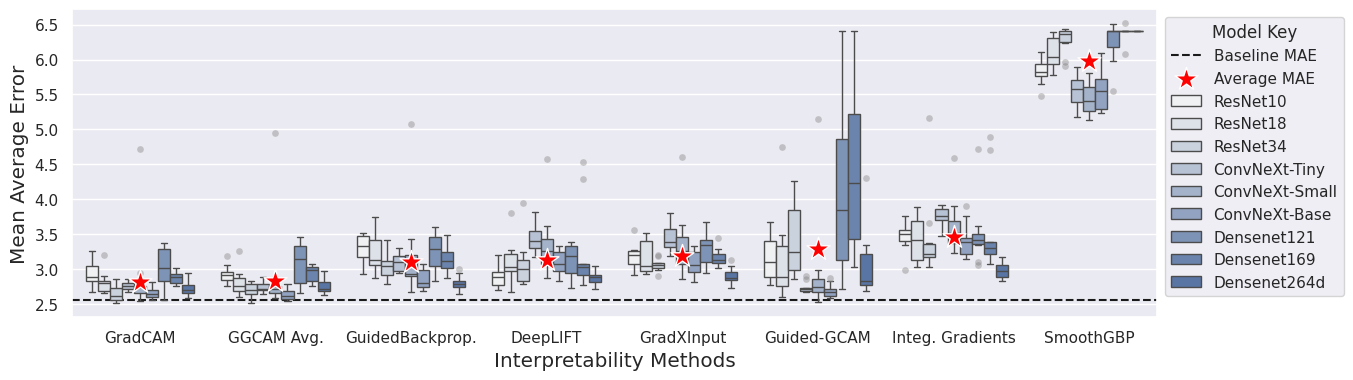

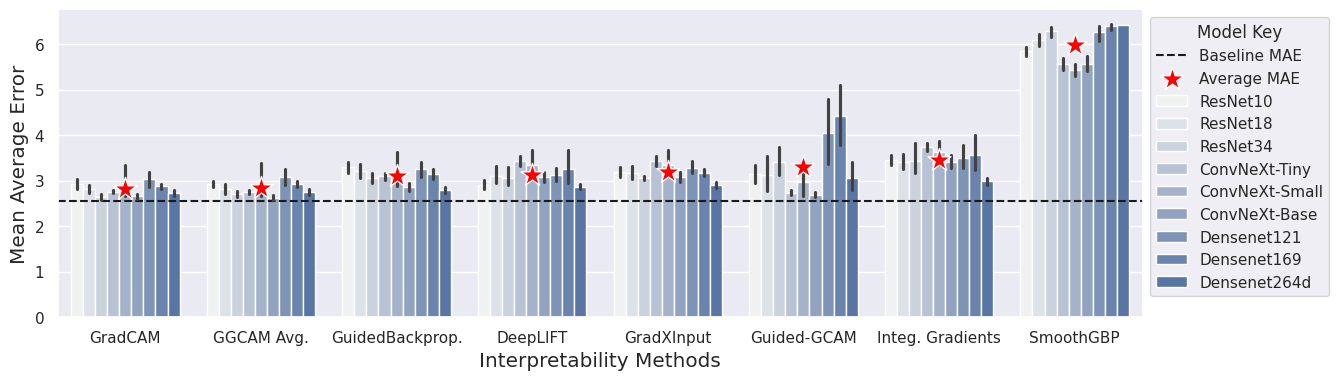

In [4]:
plot_age_ml(metric="mae", perf_table=age_lgbm)
plot_age_ml(metric="mae", perf_table=age_lgbm, plot_type="bar")

### MSE

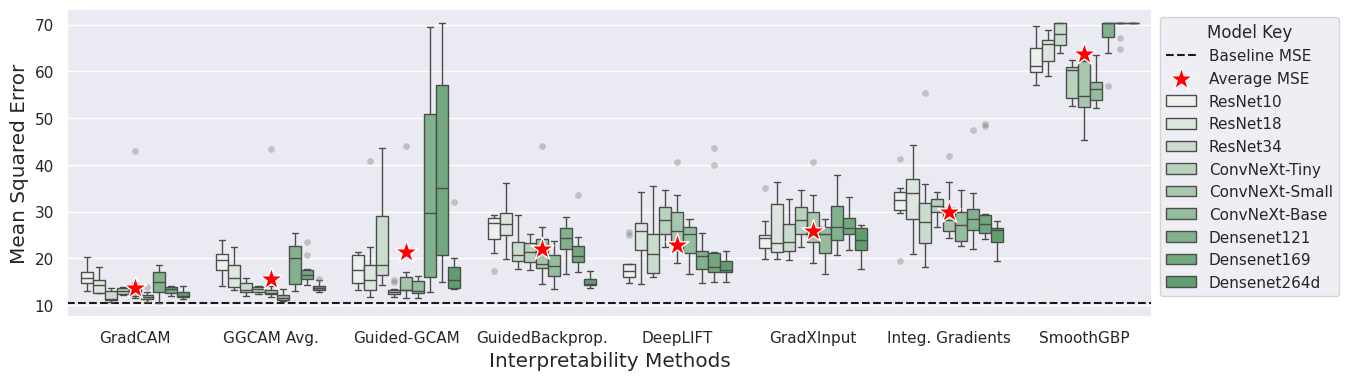

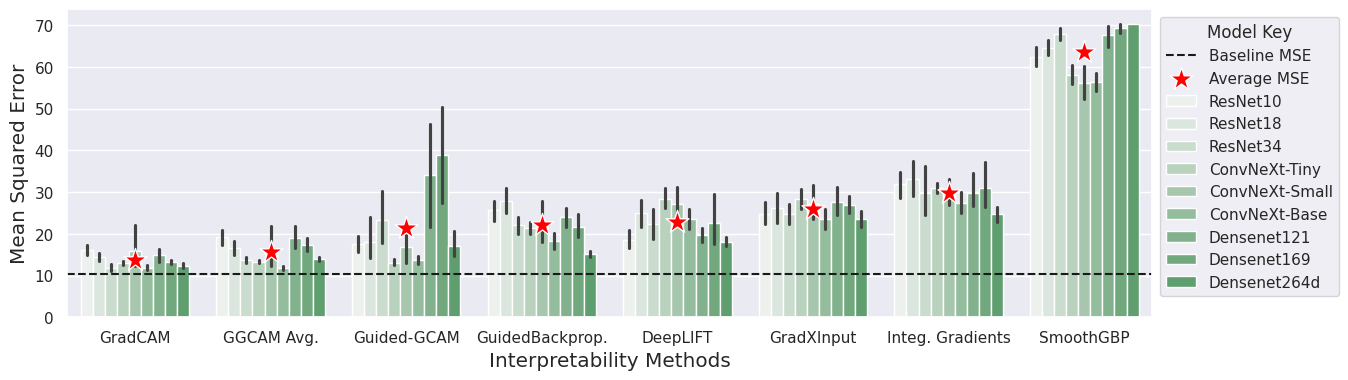

In [5]:
plot_age_ml(metric="mse", perf_table=age_knn, cmap="light:g")
plot_age_ml(metric="mse", perf_table=age_knn, cmap="light:g", plot_type="bar")

### R2

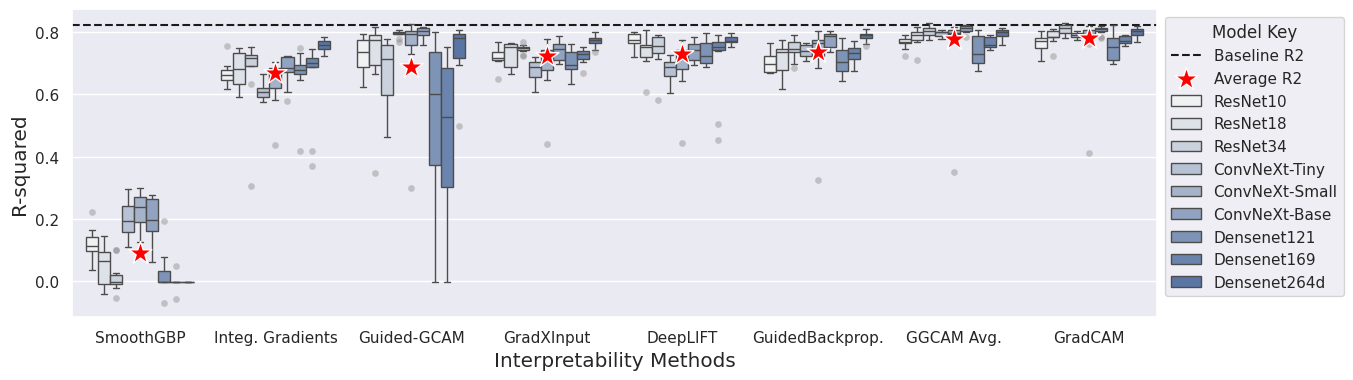

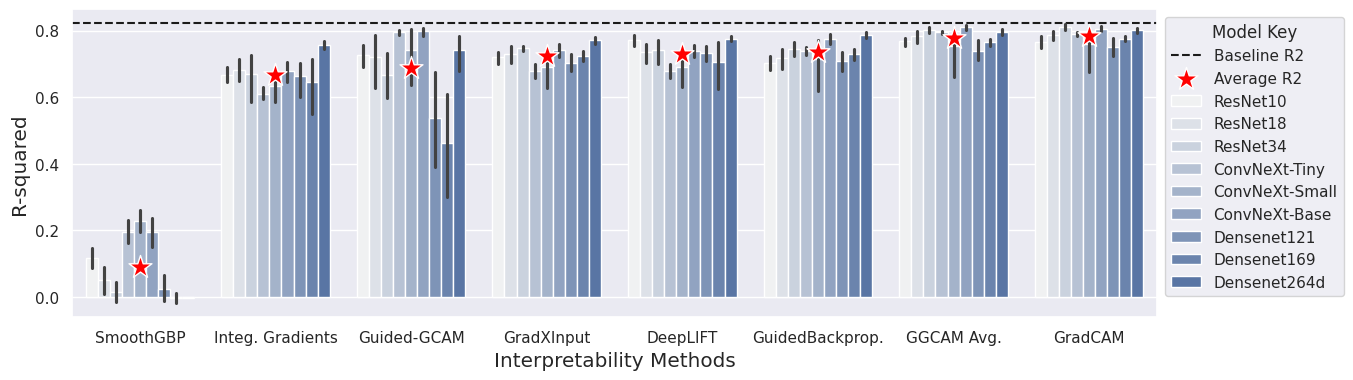

In [6]:
plot_age_ml(metric="r2", perf_table=age_lgbm)
plot_age_ml(metric="r2", perf_table=age_lgbm, plot_type="bar")

## ADNI

In [7]:
adni_lgbm = pd.read_csv("assets/lgbm_adni_241107_0722.csv")
adni_knn = pd.read_csv("assets/knn_adni_241107_0723.csv")

/tmp/ipykernel_2502718/735333436.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="XAI Method", y=metric, palette=cmap, ax=ax)
/tmp/ipykernel_2502718/735333436.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="XAI Method", y=metric, palette=cmap, ax=ax)


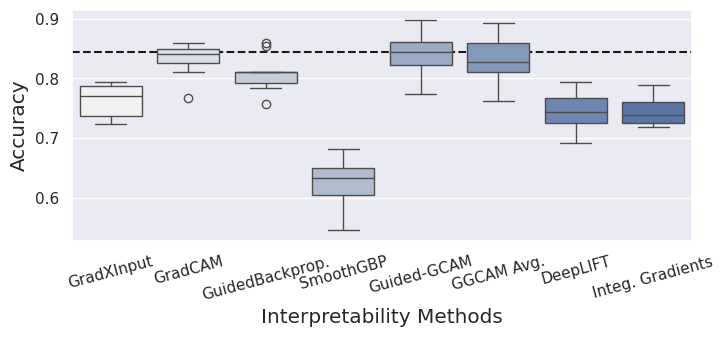

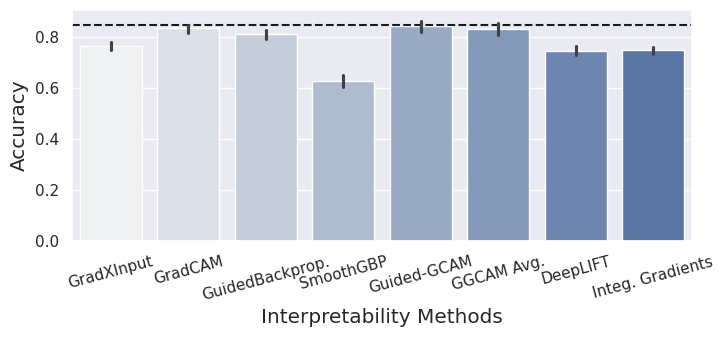

In [8]:
def plot_adni_ml(metric: str, perf_table: pd.DataFrame,
                 plot_type: str = "box", cmap: str = "light:b"):
    df = perf_table.copy()
    df["XAI Method"] = df["XAI Method"].apply(C.XAI_METHODS_MAPPER.get)
    df["Model Key"] = df["Model Key"].apply(C.MODEL_KEY.get)

    fig, ax = plt.subplots(figsize=(8, 3))
    ax.axhline(C.PERF_AVG_ADNI[metric], linestyle="--", color="k", label="Baseline")

    if plot_type == "box":
        sns.boxplot(data=df, x="XAI Method", y=metric, palette=cmap, ax=ax)
    elif plot_type == "bar":
        sns.barplot(data=df, x="XAI Method", y=metric, palette=cmap, ax=ax)
    ax.set_xlabel("Interpretability Methods", size="large")
    ax.tick_params(axis='x', rotation=15)
    ax.set_ylabel({"acc": "Accuracy", "f1": "F1-score", "auroc": "AUROC"}[metric], size="large")


plot_adni_ml(metric="acc", perf_table=adni_lgbm)
plot_adni_ml(metric="acc", perf_table=adni_lgbm, plot_type="bar")

/tmp/ipykernel_2502718/735333436.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="XAI Method", y=metric, palette=cmap, ax=ax)
/tmp/ipykernel_2502718/735333436.py:11: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x="XAI Method", y=metric, palette=cmap, ax=ax)
/tmp/ipykernel_2502718/735333436.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="XAI Method", y=metric, palette=cmap, ax=ax)
/tmp/ipykernel_2502718/735333436.py:13: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barp

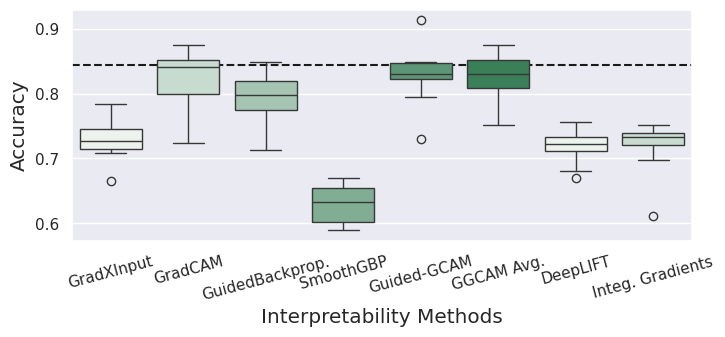

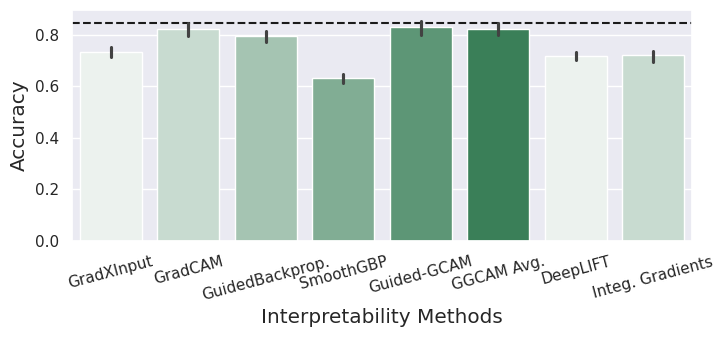

In [9]:
plot_adni_ml(metric="acc", perf_table=adni_knn, cmap=sns.light_palette("seagreen"))
plot_adni_ml(metric="acc", perf_table=adni_knn, plot_type="bar", cmap=sns.light_palette("seagreen"))